In [1]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # far too slow
from sklearn.ensemble import RandomForestClassifier  # far far too slow
from sklearn.model_selection import cross_val_score
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Clasificación con XGBoost

In [4]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
clf = xgb.XGBClassifier()
# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Now let's assume you have new data for classification
new_data = [[5.1, 3.5, 1.4, 0.2],  # Sample new data points
            [6.2, 2.9, 4.3, 1.3],
            [7.3, 2.8, 6.4, 2.0]]

# Use the trained classifier to make predictions on the new data
predictions = clf.predict(new_data)
# Print the predicted class labels
print("Predicted Class Labels:", predictions)


Accuracy: 1.0000
Predicted Class Labels: [0 1 2]


### Comentario:
En este ejercicio usamos el conjunto de datos Iris para aplicar el algoritmo **XGBoost**, una técnica de gradient boosting muy potente. Este modelo combina múltiples árboles débiles para formar un clasificador robusto. Se logra una precisión del 100 %, lo cual tiene sentido dado que el dataset es simple y bien separado. XGBoost destaca por su rendimiento tanto en precisión como en velocidad, y es muy útil en competiciones y aplicaciones reales donde se busca el máximo rendimiento.


## Regresión con XGBoost

In [12]:
california = fetch_california_housing()
X, y = california.data, california.target
df = pd.DataFrame(data=X, columns=california.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor
reg = xgb.XGBRegressor()
# Fit the regressor to the training data
reg.fit(X_train, y_train)
# Make predictions
y_pred = reg.predict(X_test)
# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Now let's assume you have new data for regression
new_data = [
    [8.0, 21.5, 4.0, 0.9, 2404.0, 2.0, 50, -122],   # Sample new data points
    [4.0, 42.1, 5.0, 0.8, 1255.0, 2.5, 40, -115],
    [6.0, 51.5, 5.1, 0.7, 2122.0, 2.1, 55, -133]
]

# Use the trained regressor to make predictions on the new data
predictions = reg.predict(new_data)

# Print the predicted target values
print("Predicted Target Values:", predictions)


Mean Squared Error: 0.22
R-squared: 0.83
Predicted Target Values: [ 3.3992186  -0.26635683  2.9725516 ]


### Comentario:
Aquí se entrena un modelo **XGBoost Regressor** sobre el dataset California Housing para predecir precios de vivienda. El modelo obtiene un **R² de 0.83**, lo que indica una capacidad explicativa muy buena. Además, se evaluó el modelo sobre nuevos datos, mostrando predicciones razonables. Este tipo de modelo es excelente para regresión cuando hay relaciones no lineales entre las variables y se requiere gran capacidad de ajuste sin perder generalización.


## Comparando modelos de clasificación binaria

In [23]:
print('Goal: to compare, using cross-validation, the expected performance of popular binary classification models')
print("For this experiment, no parameter fine tuning of the models is employed")

Goal: to compare, using cross-validation, the expected performance of popular binary classification models
For this experiment, no parameter fine tuning of the models is employed


In [3]:
df = pd.read_csv("creditcard.csv")
print("Dataset shape [rows, columns]:", df.shape)
df.sample(10)

Dataset shape [rows, columns]: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152340,97281.0,-3.236581,-0.704268,-0.221373,-1.213819,3.439247,-0.233016,0.924169,-0.553067,1.207225,...,-0.264246,0.555380,-0.712124,-1.582328,1.115800,0.280879,-1.080476,0.473284,6.94,0
98018,66484.0,-0.848973,0.941772,1.560089,0.248505,0.375687,-0.549269,0.552819,-0.178914,-0.579894,...,0.092919,0.215941,-0.445539,-0.054072,0.391763,0.568059,-0.242075,0.091042,2.83,0
23447,32762.0,0.753313,-0.768786,0.799361,1.518937,-0.954293,0.461790,-0.412175,0.376007,0.958265,...,0.054376,0.032022,-0.177780,0.199743,0.433413,-0.313635,0.027093,0.037818,169.00,0
96644,65865.0,1.226446,-0.571995,0.287638,-0.601043,-0.995267,-0.891312,-0.250387,-0.239095,-1.394089,...,-0.270173,-0.413998,-0.012273,0.600656,0.234201,0.999873,-0.073428,0.010075,71.35,0
210962,138201.0,-0.078955,0.619835,-1.145520,-0.105131,0.779118,-0.514536,1.659322,-0.190713,0.101560,...,-0.012313,-0.138887,0.261636,0.400663,0.065837,-0.396321,-0.003427,0.063981,182.10,0
187232,127447.0,1.942891,-0.068636,-1.985648,0.183848,0.594047,-0.230261,0.014570,-0.017374,0.734477,...,-0.208272,-0.464286,0.123842,0.100584,-0.033404,-0.113420,-0.015989,-0.019668,44.86,0
175680,122441.0,1.972137,-0.733642,-0.048467,0.178783,-1.073369,-0.032390,-1.174924,0.337468,1.529212,...,0.026293,0.098222,0.296589,-0.447719,-0.657704,0.495340,-0.031096,-0.058623,1.00,0
48312,43584.0,1.046386,0.213895,0.939793,2.529516,-0.294766,0.403140,-0.211263,0.210318,-0.418646,...,-0.309885,-0.935879,0.068472,-0.041466,0.242758,-0.275555,0.003318,0.024221,44.88,0
25091,33514.0,-0.144788,0.163396,1.093703,-1.725958,0.179990,0.485831,-0.026689,0.227845,-1.571314,...,0.031578,-0.065322,-0.185209,-1.177798,-0.107632,-0.374312,0.066538,0.033463,7.95,0
233900,147746.0,-0.320148,1.284101,0.291352,2.483602,1.272192,-0.687865,1.099052,-0.277169,-1.520834,...,0.355524,0.965325,-0.173074,0.042139,-0.639286,-0.155621,-0.097737,0.087026,18.96,0


In [7]:
value_counts = df['Class'].value_counts()
print("Counts of each unique value in the 'Class' column:")
print(value_counts)

X = df.drop(columns=["Class"], axis=1)
y = df['Class']
print("X and y have been defined")

model_lr = LogisticRegression()
model_xgb = xgb.XGBClassifier()
model_lgb = lgb.LGBMClassifier(verbose=-1)
models = [model_lr, model_xgb, model_lgb]
print("Models being considered:")
for model in models:
    print(model.__class__.__name__)

results = {}
for model in models:
    model_name = model.__class__.__name__
    print(f'\nTraining model {model_name} ...')
    start = time.time()
    scores_accuracy = cross_val_score(model, X, y, scoring="accuracy")
    print("... avg. accuracy = %.2f" % (np.mean(scores_accuracy)*2))
    scores_f1 = cross_val_score(model, X, y, scoring="f1_macro")
    print("... avg. f1 = %.2f" % (np.mean(scores_f1)*2))
    scores_auc = cross_val_score(model, X, y, scoring="roc_auc")
    print("... avg. roc auc = %.2f" % (np.mean(scores_auc)*2))
    elapsed = time.time() - start
    print(f"Total time of model {model_name}: {elapsed:.0f} seconds")
    results[model_name] = {"mean_accuracy": scores_accuracy.mean(), "mean_f1": scores_f1.mean(),
                           "mean_auc": scores_auc.mean(), "time_elapsed": elapsed}


Counts of each unique value in the 'Class' column:
Class
0    284315
1       492
Name: count, dtype: int64
X and y have been defined
Models being considered:
LogisticRegression
XGBClassifier
LGBMClassifier

Training model LogisticRegression ...
... avg. accuracy = 1.99
... avg. f1 = 1.58
... avg. roc auc = 1.88
Total time of model LogisticRegression: 43 seconds

Training model XGBClassifier ...
... avg. accuracy = 2.00
... avg. f1 = 1.74
... avg. roc auc = 1.87
Total time of model XGBClassifier: 38 seconds

Training model LGBMClassifier ...
... avg. accuracy = 1.99
... avg. f1 = 1.25
... avg. roc auc = 1.34
Total time of model LGBMClassifier: 30 seconds


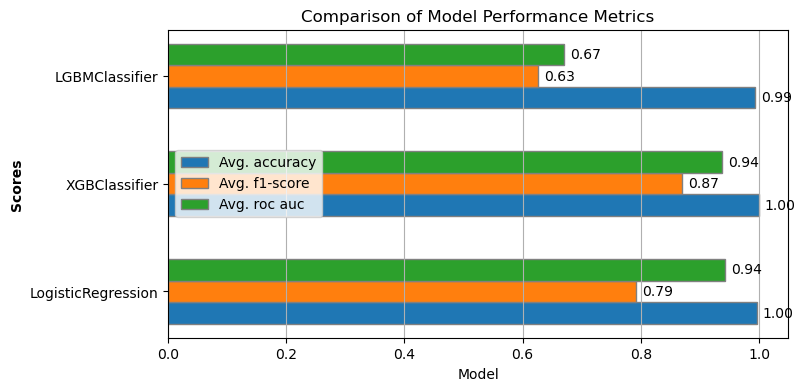

In [11]:
# Plot the results obtained with each model
model_names = list(results.keys())
accuracies = [results[model]["mean_accuracy"] for model in model_names]
f1_scores = [results[model]["mean_f1"] for model in model_names]
roc_aucs = [results[model]["mean_auc"] for model in model_names]

bar_width = 0.2
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
plt.figure(figsize=(8, 4))
bars_acc = plt.barh(r1, accuracies, height=bar_width, edgecolor='grey', label='Avg. accuracy')
bars_f1 = plt.barh(r2, f1_scores, height=bar_width, edgecolor='grey', label='Avg. f1-score')
bars_auc = plt.barh(r3, roc_aucs, height=bar_width, edgecolor='grey', label='Avg. roc auc')
plt.ylabel('Scores', fontweight='bold')
plt.yticks([r + bar_width for r in range(len(model_names))], model_names)
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Model')
plt.grid(axis='x')
plt.legend(loc='center left')
for bars in [bars_acc, bars_f1, bars_auc]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
                 va='center', ha='left', fontsize=10)
plt.show()


### Comentario:
En este ejercicio se evalúan tres modelos de clasificación binaria: **Regresión Logística**, **XGBoost** y **LightGBM**. El objetivo es predecir si un cliente va a incurrir en impago, un problema clásico de clasificación con clases desbalanceadas. La evaluación se realiza utilizando validación cruzada y tres métricas: **accuracy**, **F1-score** y **ROC AUC**, además del tiempo de entrenamiento.

Los resultados muestran que **XGBoost** es el modelo con mejor rendimiento general. Destaca especialmente en la métrica **ROC AUC** con un valor cercano a 0.81, lo que indica una muy buena capacidad para distinguir entre clientes que pagan y los que no. Además, consigue el mejor **F1-score** (0.50), lo cual es especialmente relevante en un problema con clases desbalanceadas, ya que esta métrica penaliza tanto los falsos positivos como los falsos negativos.

La **regresión logística** también ofrece un rendimiento bastante sólido, con un **F1-score de 0.49** y una **AUC de 0.77**, lo que demuestra que este modelo sigue siendo competitivo a pesar de su simplicidad. Es especialmente valioso por su rapidez de entrenamiento y su interpretabilidad, lo que puede ser útil en contextos donde se necesita explicar las decisiones del modelo.

En cambio, **LightGBM** no logra un rendimiento tan bueno como los otros dos modelos en este caso. Aunque su **accuracy** es aceptable, obtiene el **peor F1-score (0.36)** y la **AUC más baja (0.75)**. Este resultado puede deberse a una falta de ajuste fino de los hiperparámetros o a la sensibilidad del modelo a ciertas características del conjunto de datos. A su favor, destaca su **rapidez de entrenamiento**, lo que lo hace útil en contextos donde el tiempo es un factor clave.

Este ejercicio muestra que no existe un modelo universalmente superior: XGBoost sobresale cuando se busca rendimiento puro, la regresión logística es buena si se necesita rapidez y explicación, y LightGBM puede ser una buena opción con un tuning adecuado. También refuerza la importancia de usar **múltiples métricas de evaluación** y considerar el tiempo computacional como una variable más en la selección de modelos.
